In [8]:
import talib as ta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as web
import datetime as dt
import mplfinance as mpf
import yfinance as yf
import myTA
import pandas as pd
from myTA import downloadAndMakeAnalysis, makeAnalysis, plotAnalysis, Portfolio, Trade, calculateProfit, TradingStrategies

In [129]:
tickers = pd.read_csv("nasdaqTickers.csv")
tickers

,Symbol,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
0,A,Agilent Technologies Inc. Common Stock,$149.65,-1.4400,-0.953%,4.430718e+10,United States,1999.0,699759,Industrials,Electrical Products
1,AA,Alcoa Corporation Common Stock,$45.47,-1.0900,-2.341%,8.045333e+09,NaN,2016.0,3584741,Industrials,Metal Fabrications
2,AAC,Ares Acquisition Corporation Class A Ordinary ...,$10.07,-0.0200,-0.198%,1.258750e+09,NaN,2021.0,213355,Finance,Business Services
3,AACG,ATA Creativity Global American Depositary Shares,$1.2733,-0.0767,-5.681%,3.995223e+07,China,2008.0,14435,Consumer Discretionary,Service to the Health Industry
4,AACI,Armada Acquisition Corp. I Common Stock,$10.12,0.0200,0.198%,2.095801e+08,United States,2021.0,20672,Industrials,Consumer Electronics/Appliances
...,...,...,...,...,...,...,...,...,...,...,...
8053,ZVSA,ZyVersa Therapeutics Inc. Common Stock,$1.57,0.0200,1.29%,1.425862e+07,United States,2022.0,45625,Health Care,Biotechnology: Pharmaceutical Preparations
8054,ZWS,Zurn Elkay Water Solutions Corporation Common ...,$21.15,-0.6600,-3.026%,3.760356e+09,United States,2012.0,890354,Utilities,Environmental Services
8055,ZYME,Zymeworks Inc. Common Stock,$7.86,0.0500,0.64%,4.951510e+08,United States,NaN,362492,Health Care,Biotechnology: Biological Products (No Diagnos...
8056,ZYNE,Zynerba Pharmaceuticals Inc. Common Stock,$0.53,-0.0369,-6.509%,2.494324e+07,United States,2015.0,470618,Health Care,Biotechnology: Pharmaceutical Preparations


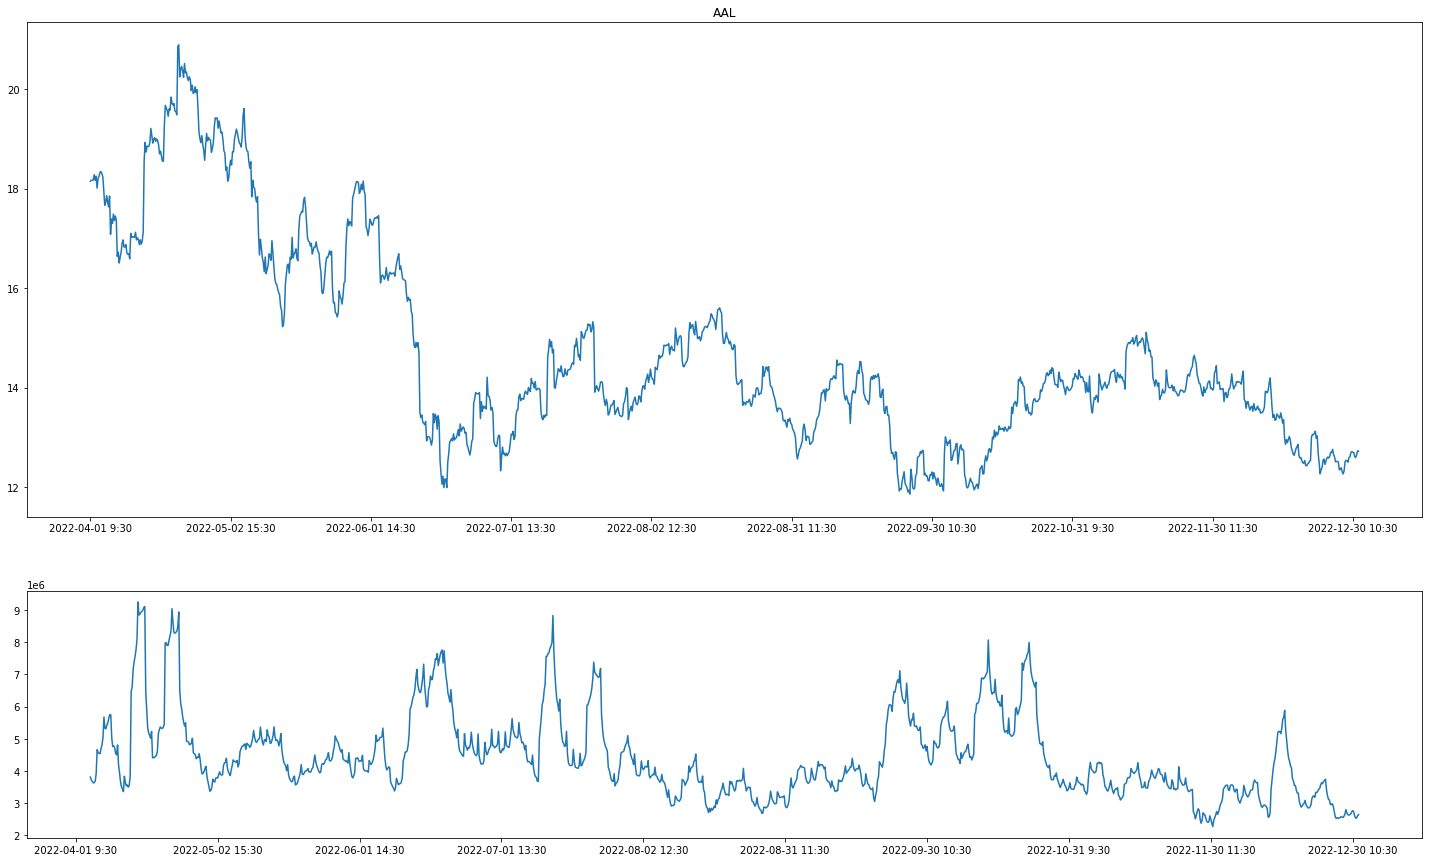


1 Failed download:
- AAM^A: No data found, symbol may be delisted


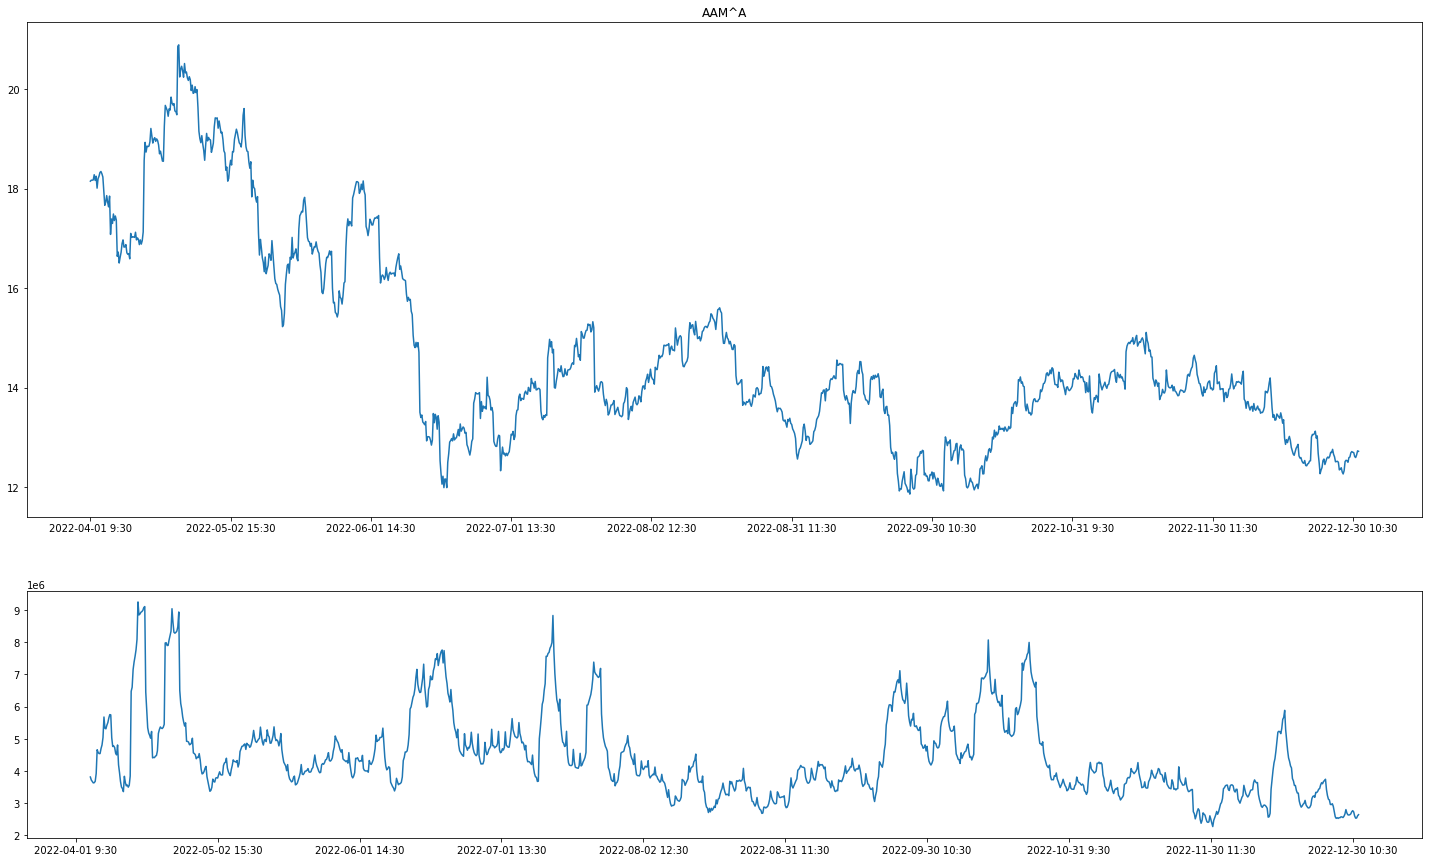


1 Failed download:
- AAM^B: No data found, symbol may be delisted


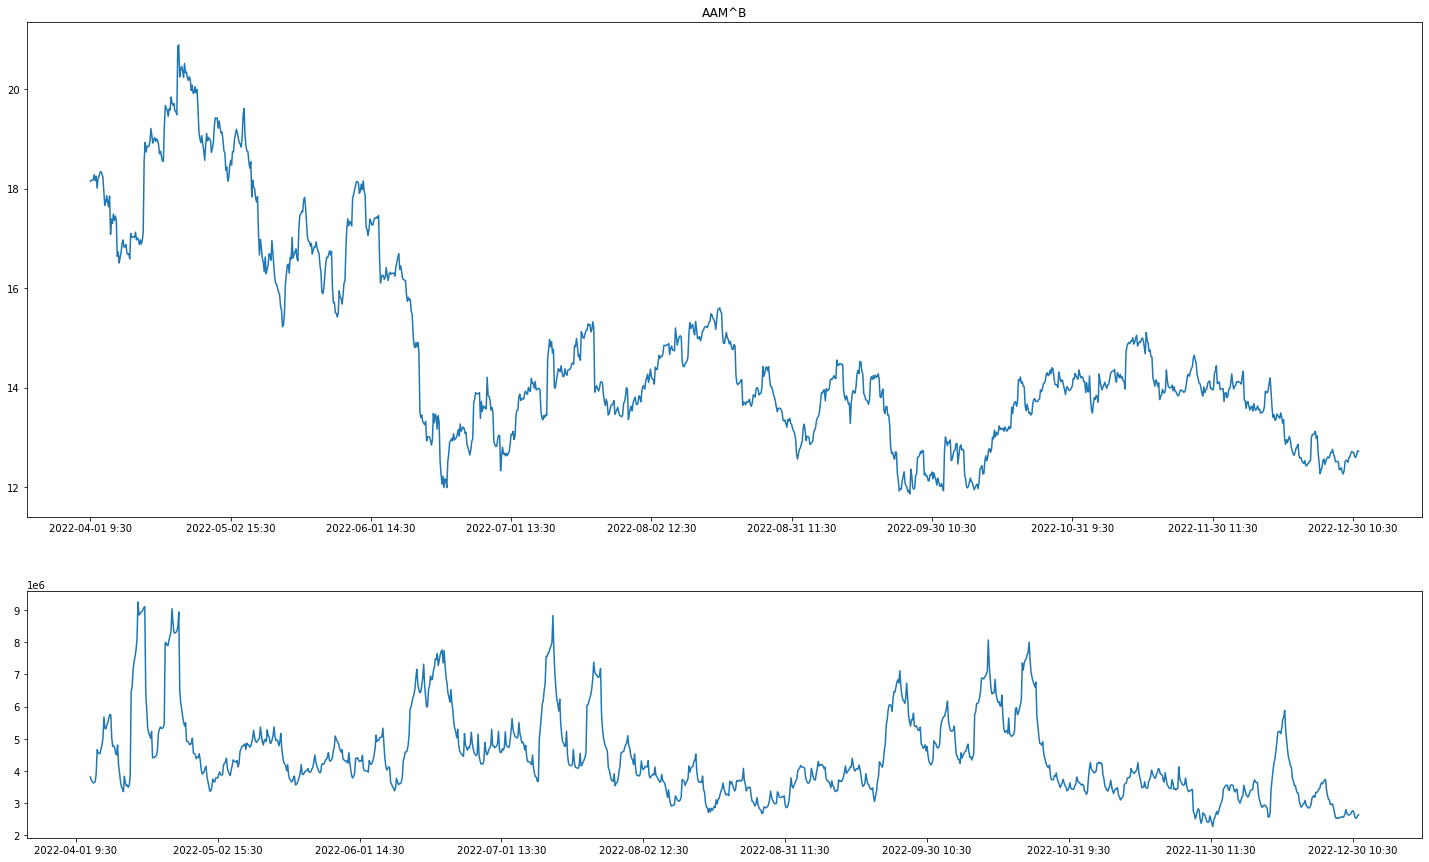

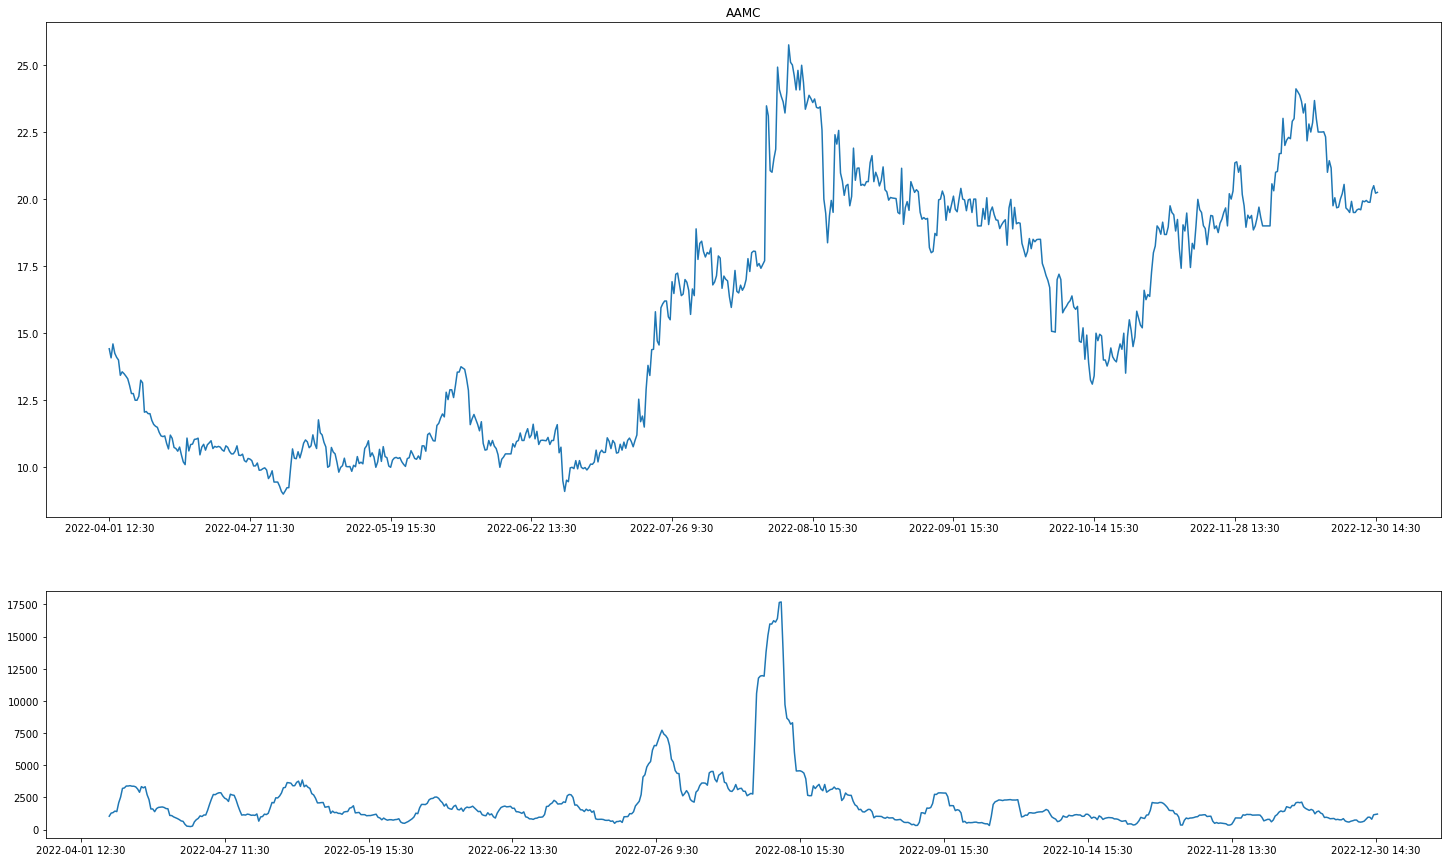

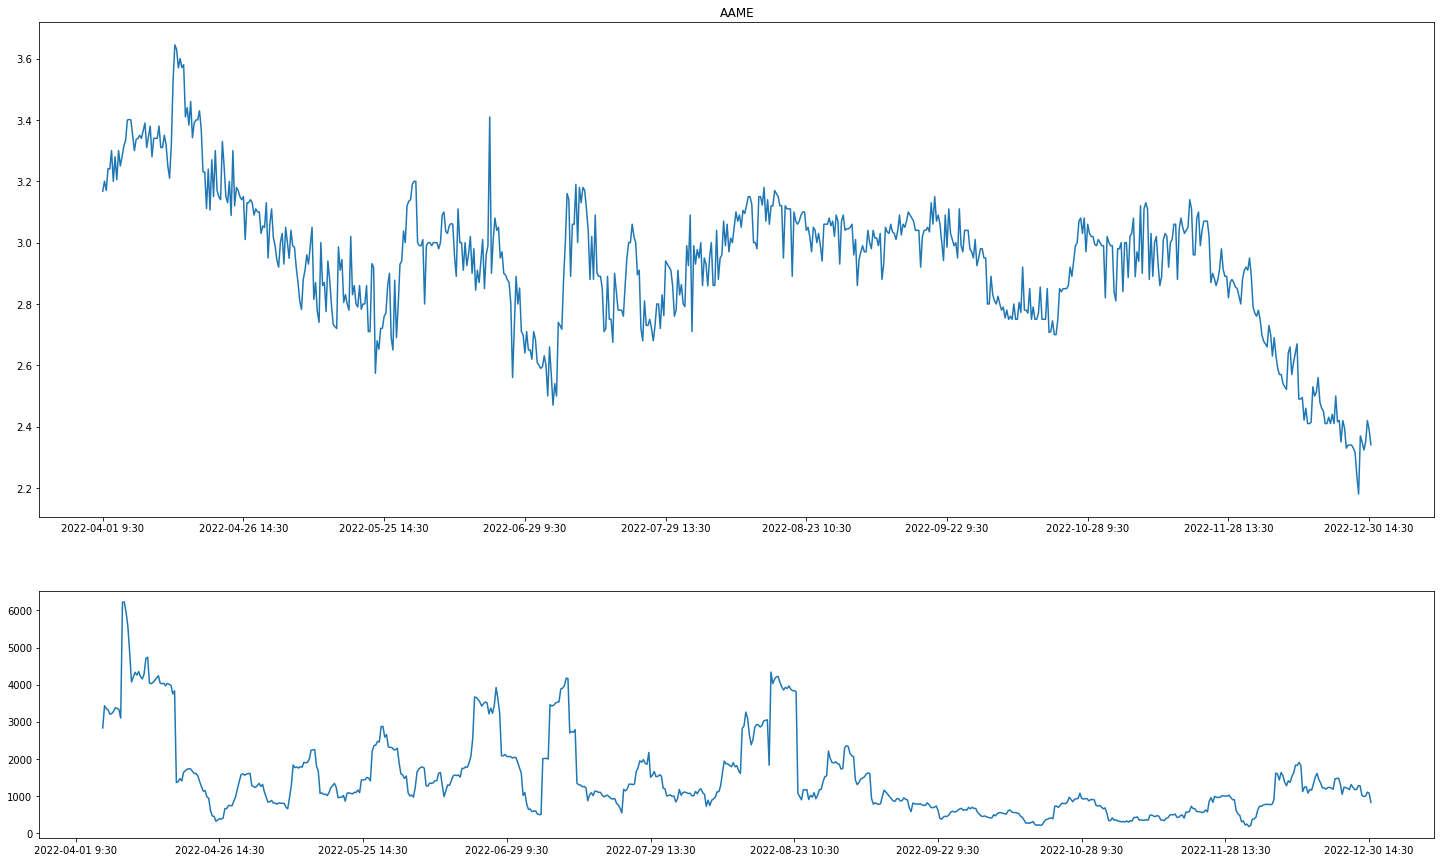

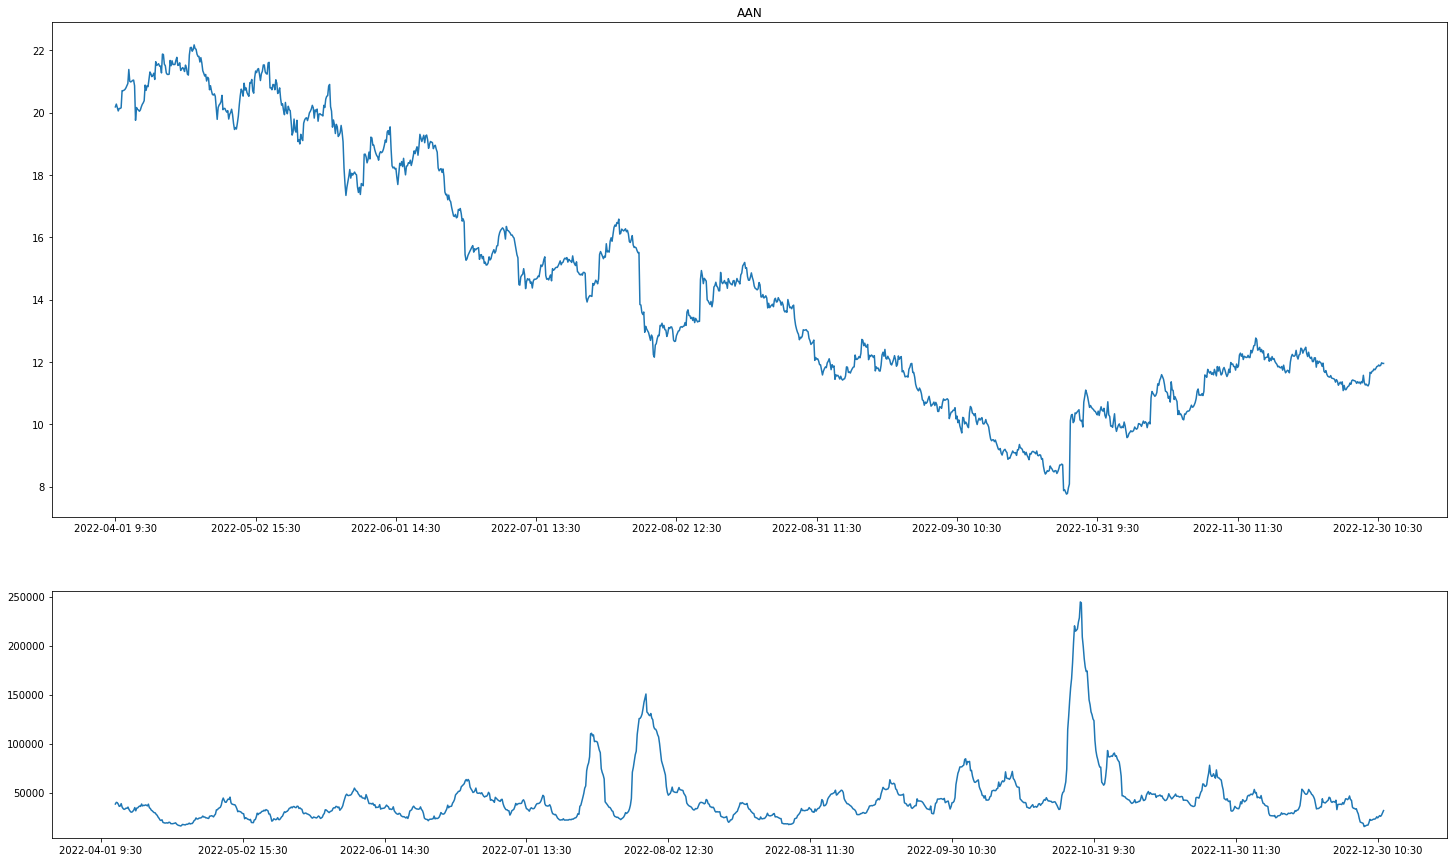

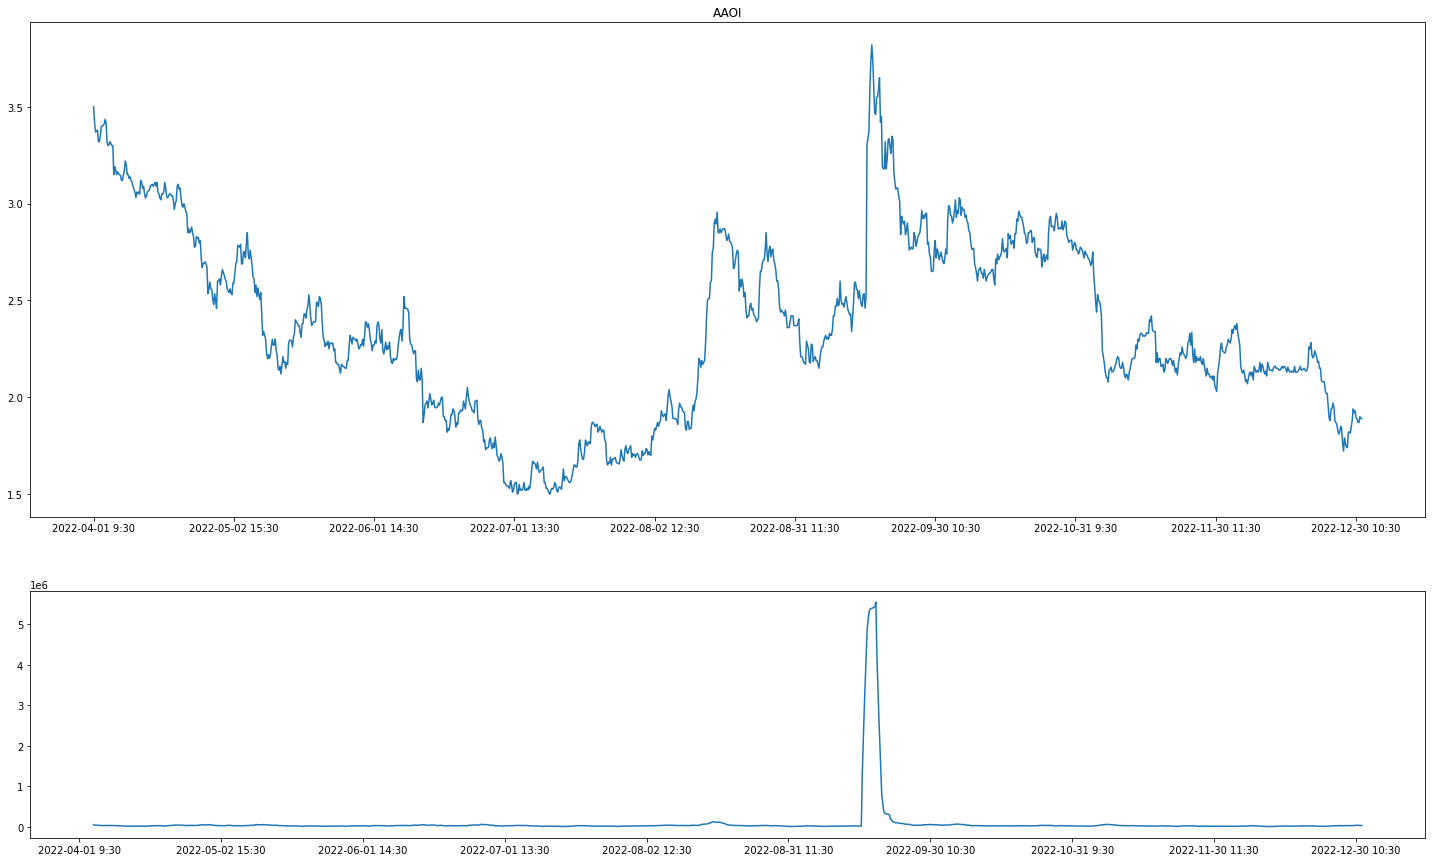

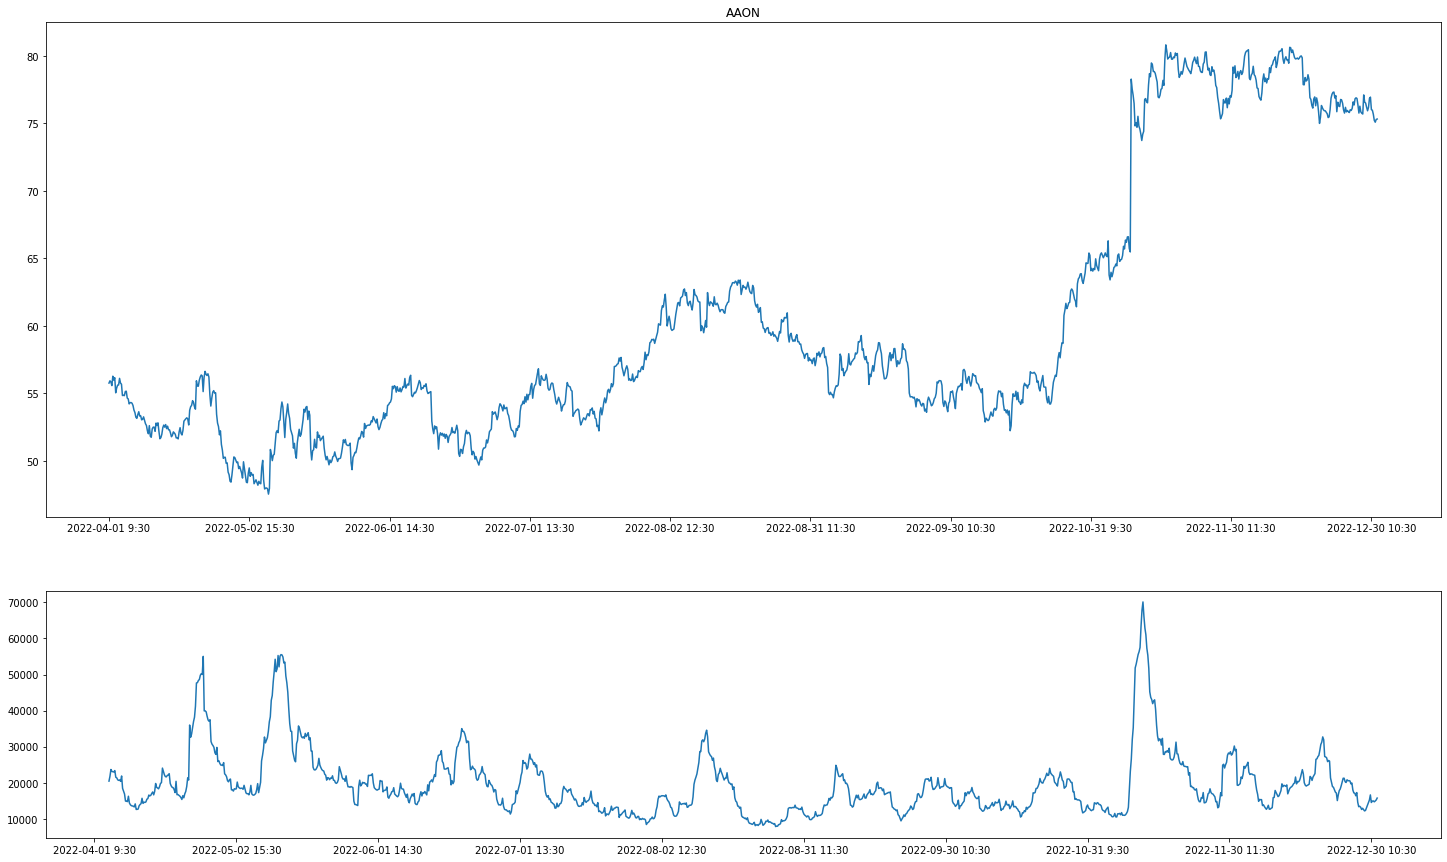

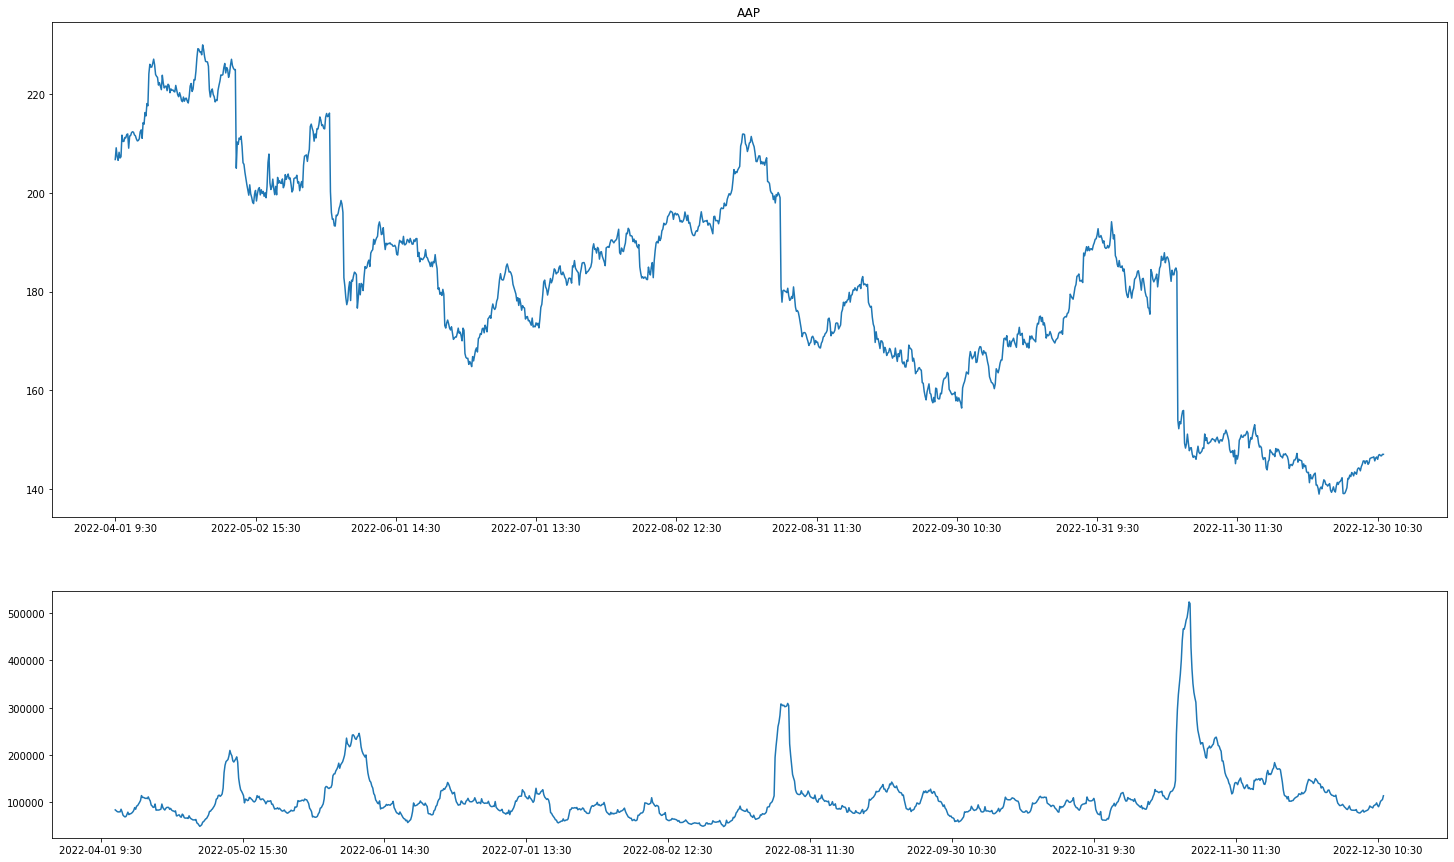

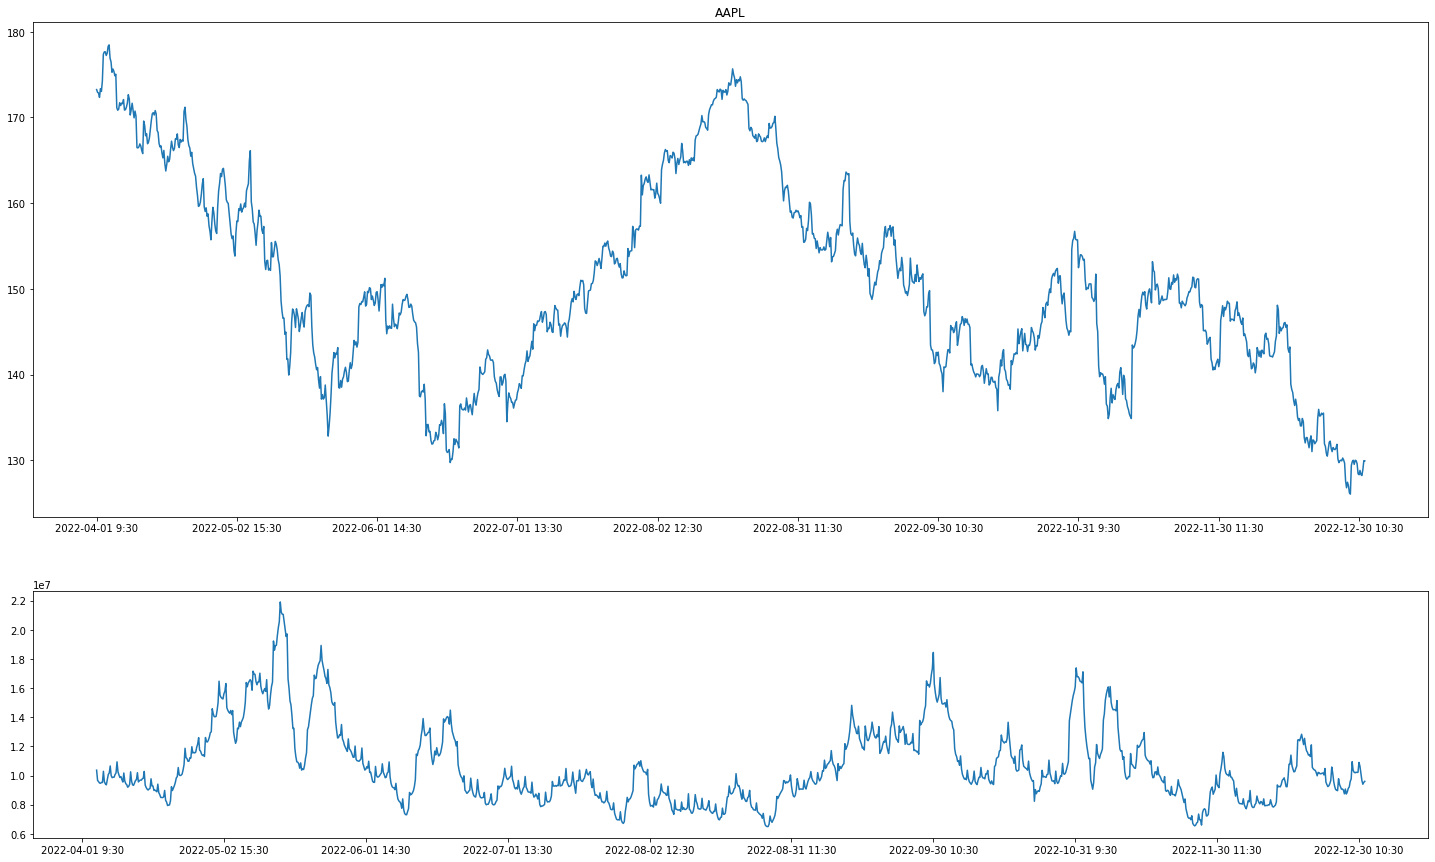

In [138]:
for i in range(10,20):
    code = tickers['Symbol'][i]
    try:
        data = myTA.downloadAndMakeAnalysis(code, dt.datetime(2022,4,1), dt.datetime.now(),'1h')
    except:
        pass

    window = 5
    till = len(data)

    data['min'] = np.nan
    data['max'] = np.nan


    for i in range(window,till):
        data.loc[data.index[i], 'min'] = np.min(data.loc[data.index[i-window:i], 'Close'])
        data.loc[data.index[i], 'max'] = np.max(data.loc[data.index[i-window:i], 'Close'])

    fig, ax = plt.subplots(2, 1, gridspec_kw={"height_ratios": [2, 1]}, figsize=(25,15))
    inedxes = np.arange(0,len(data), len(data) // 9)

    # ax[0].plot(data['min'].values)
    # ax[0].plot(data['max'].values)
    ax[0].plot(data['Close'].values)
    ax[0].set_title(code)
    plt.sca(ax[0])
    plt.xticks(inedxes, [str(data.index[i].date())+ " "+str(data.index[i].hour)+":"+str("%02d" % data.index[i].minute) for i in inedxes])

    # ax[1].plot(data['Volume'].values)
    window = 15
    ax[1].plot(np.concatenate([[np.nan for _ in range(window)],[np.mean(data['Volume'].values[i-window:i]) for i in range(window,len(data['Volume'].values))]]))
    plt.sca(ax[1])
    plt.xticks(inedxes, [str(data.index[i].date())+ " "+str(data.index[i].hour)+":"+str("%02d" % data.index[i].minute) for i in inedxes])
    plt.show()

In [ ]:
    code = tickers['Symbol'][i]
    try:
        data = myTA.downloadAndMakeAnalysis(code, dt.datetime(2022,4,1), dt.datetime.now(),'1h')
    except:
        pass

    window = 5
    till = len(data)

    data['min'] = np.nan
    data['max'] = np.nan


    for i in range(window,till):
        data.loc[data.index[i], 'min'] = np.min(data.loc[data.index[i-window:i], 'Close'])
        data.loc[data.index[i], 'max'] = np.max(data.loc[data.index[i-window:i], 'Close'])

    fig, ax = plt.subplots(2, 1, gridspec_kw={"height_ratios": [2, 1]}, figsize=(25,15))
    inedxes = np.arange(0,len(data), len(data) // 9)

    # ax[0].plot(data['min'].values)
    # ax[0].plot(data['max'].values)
    ax[0].plot(data['Close'].values)
    ax[0].set_title(code)
    plt.sca(ax[0])
    plt.xticks(inedxes, [str(data.index[i].date())+ " "+str(data.index[i].hour)+":"+str("%02d" % data.index[i].minute) for i in inedxes])

    # ax[1].plot(data['Volume'].values)
    window = 15
    ax[1].plot(np.concatenate([[np.nan for _ in range(window)],[np.mean(data['Volume'].values[i-window:i]) for i in range(window,len(data['Volume'].values))]]))
    plt.sca(ax[1])
    plt.xticks(inedxes, [str(data.index[i].date())+ " "+str(data.index[i].hour)+":"+str("%02d" % data.index[i].minute) for i in inedxes])
    plt.show()